# **RDBMS:**

There are various RDBMS's:
- **MySQL** (or MariaDB) is arguably the most popular [MariaDB is a community-developed, commercially supported fork of the MySQL]
- **PostgreSQL** is arguably the best
- **SQL Server** is good, but not free
- There's more, but these are the main ones

# **<font color='deepskyblue'>PostgreSQL - Python (psycopg2):</font>**

<br>
<img src="imgs/psycopg2_logo.png" width="300" height="300">
<br>
<br>

### - **How does python interact with python trough psycopg2:**

<br>
<img src="imgs/psycopg2_module.png" width="900" height="250">
<br>

### **Install psycopg2:**
```python
pip install psycopg2
```

# **Work with psycopg2:**

<br>
<img src="imgs/psycopg2.png" width="900" height="230">
<br>

In [ ]:
!pip install psycopg2

## **craete database and insert data**

In [ ]:
# Install postgresql server
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

# Setup a password `postgres` for username `postgres`
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'admin';"

# Setup a database with name `northwind` to be used
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS northwind;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE northwind;'

 * Starting PostgreSQL 10 database server
   ...done.
ALTER ROLE
DROP DATABASE
CREATE DATABASE


In [ ]:
!sudo -u postgres psql -h localhost -U postgres -d northwind -a -f /content/northwind.sql
!sudo -u postgres psql -h localhost -U postgres -d northwind -a -f /content/northwind_data.sql

Streaming output truncated to the last 5000 lines.
INSERT 0 1
INSERT INTO order_details VALUES (10547, 36, 19, 60, 0);
INSERT 0 1
INSERT INTO order_details VALUES (10548, 34, 14, 10, 0.25);
INSERT 0 1
INSERT INTO order_details VALUES (10548, 41, 9.64999962, 14, 0);
INSERT 0 1
INSERT INTO order_details VALUES (10549, 31, 12.5, 55, 0.150000006);
INSERT 0 1
INSERT INTO order_details VALUES (10549, 45, 9.5, 100, 0.150000006);
INSERT 0 1
INSERT INTO order_details VALUES (10549, 51, 53, 48, 0.150000006);
INSERT 0 1
INSERT INTO order_details VALUES (10550, 17, 39, 8, 0.100000001);
INSERT 0 1
INSERT INTO order_details VALUES (10550, 19, 9.19999981, 10, 0);
INSERT 0 1
INSERT INTO order_details VALUES (10550, 21, 10, 6, 0.100000001);
INSERT 0 1
INSERT INTO order_details VALUES (10550, 61, 28.5, 10, 0.100000001);
INSERT 0 1
INSERT INTO order_details VALUES (10551, 16, 17.4500008, 40, 0.150000006);
INSERT 0 1
INSERT INTO order_details VALUES (10551, 35, 18, 20, 0.150000006);
INSERT 0 1
INSERT INTO

## **First Look:**

In [ ]:
import psycopg2
con = psycopg2.connect(database='northwind', user='postgres', password='admin', host='localhost')
cur = con.cursor()
cur.execute("select * from products limit 10")
for row in cur:
  print(row)

(1, 'Chai', 8, 1, '10 boxes x 30 bags', 18.0, 39, 0, 10, 1)
(2, 'Chang', 1, 1, '24 - 12 oz bottles', 19.0, 17, 40, 25, 1)
(3, 'Aniseed Syrup', 1, 2, '12 - 550 ml bottles', 10.0, 13, 70, 25, 0)
(4, "Chef Anton's Cajun Seasoning", 2, 2, '48 - 6 oz jars', 22.0, 53, 0, 0, 0)
(5, "Chef Anton's Gumbo Mix", 2, 2, '36 boxes', 21.35, 0, 0, 0, 1)
(6, "Grandma's Boysenberry Spread", 3, 2, '12 - 8 oz jars', 25.0, 120, 0, 25, 0)
(7, "Uncle Bob's Organic Dried Pears", 3, 7, '12 - 1 lb pkgs.', 30.0, 15, 0, 10, 0)
(8, 'Northwoods Cranberry Sauce', 3, 2, '12 - 12 oz jars', 40.0, 6, 0, 0, 0)
(9, 'Mishi Kobe Niku', 4, 6, '18 - 500 g pkgs.', 97.0, 29, 0, 0, 1)
(10, 'Ikura', 4, 8, '12 - 200 ml jars', 31.0, 31, 0, 0, 0)


/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


## **Connect function:**

In [ ]:
def connect():
  return psycopg2.connect(database='northwind', user='postgres', password='admin', host='localhost')

## **Creating Table with psycopg2:**

- **In here we're going to create a function that is used to create two table for us, using psycppg2:**

- you have to design tables named 'users' and 'contacts' in which contacts table has a foreign key to the users table.

In [ ]:
def craete_table():
  commands = (""" create table if not exists users (
    user_id INT GENERATED ALWAYS AS IDENTITY,
    first_name VARCHAR(255) NOT NULL,
    last_name VARCHAR(255) NOT NULL,
    PRIMARY KEY (user_id)
  )""", """ create table if not exists contacts (
    contact_id INT GENERATED ALWAYS AS IDENTITY,
    user_id INT,
    contact_name VARCHAR(255) NOT NULL,
    phone VARCHAR(15),
    email VARCHAR(100),
    PRIMARY KEY (contact_id),
    CONSTRAINT fk_user
      FOREIGN KEY (user_id)
      REFERENCES users (user_id)

  ) """)
  con = None
  try:
    con = connect()
    cur = con.cursor()

    for command in commands:
      cur.execute(command)
    cur.close()
    con.commit()
  except (Exception, psycopg2.DatabaseError) as err:
    print(err)
  finally:
    if con is not None:
      con.close()

In [ ]:
craete_table()

In [ ]:
class User:
  def __init__(self, first_name, last_name, user_id):
    self.first_name = first_name
    self.last_name = last_name
    self.user_id = user_id

  def __repr__(self):
    return "<User {}>".format(self.user_id)

  def save_to_db(self):
    with connect() as con:
      with con.cursor() as cur:
        cur.execute("insert into users (first_name, last_name) values (%s, %s)",
                    (
                      self.first_name, self.last_name
                    )
        )

  def print_data(self):
    print(self.first_name, self.last_name, self.user_id)

  @classmethod      
  def load_from_db_by_id(cls, id):
    with connect() as con:
      with con.cursor() as cur:
        cur.execute("select * from users where user_id = %d"%(id))
        user_data = cur.fetchone()
        return cls(first_name=user_data[1], last_name=user_data[2], user_id=user_data[0])

In [ ]:
class Contact:
  def __init__(self, user_id, contact_name, phone, email, contact_id):
    self.user_id = user_id
    self.contact_name = contact_name
    self.phone = phone
    self.email = email
    self.contact_id = contact_id

  def __repr__(self):
    return "<Contact {}>".format(self.contact_id)

  def save_to_db(self):
    with connect() as con:
      with con.cursor() as cur:
        cur.execute('''insert into Contacts (user_id, contact_name, phone, email) values
              ((select user_id from users where user_id=%s), %s, %s, %s)''',
              (self.user_id, self.contact_name, self.phone, self.email)
        )

  def print_data(self):
    print(self.user_id, self.contact_name, self.phone, self.email, self.contact_id)

  @classmethod      
  def load_from_db_by_email(cls, email):
    with connect() as con:
      with con.cursor() as cur:
        cur.execute("select * from Contacts where email = %s",(email,))
        user_data = cur.fetchone()
        return cls(user_id=user_data[1], contact_name=user_data[2], phone=user_data[3],
                   email=user_data[4] , contact_id=user_data[0])

In [ ]:
user1 = User('Ali', 'Edalat', None)
user1.save_to_db()

In [ ]:
user2 = User('Ehsan', 'Edalat', None)
user2.save_to_db()

In [ ]:
user1 = User.load_from_db_by_id(1)

In [ ]:
user1.first_name

'Ali'

In [ ]:
user2 = User.load_from_db_by_id(2)
user2.first_name

'Ehsan'

In [ ]:
contact1 = Contact(1, 'ALiE', '09*****', 'ali@example.com', None)
contact1.save_to_db()

In [ ]:
contact2 = Contact(2, 'EhsanE', '09**5**', 'ehsan@example.com', None)
contact2.save_to_db()

In [ ]:
contact1 = Contact.load_from_db_by_email('ali@example.com')

In [ ]:
contact1.contact_name, contact1.email, contact1.phone

('ALiE', 'ali@example.com', '09*****')

In [ ]:
contact1.print_data()

1 ALiE 09***** ali@example.com 1


## **Write Query:**

- In this part, we want to get the customers that have purchased the most (in value terms)

In [ ]:
def get_most_purchased():
  with connect() as con:
    with con.cursor() as cur:
      cur.execute(
      '''
      select customers.customer_id, customers.contact_name,
        sum(
          order_details.unit_price*order_details.quantity
        ) as price,
        count(order_details.product_id) as products
      from order_details
      inner join orders on orders.order_id = order_details.order_id
      inner join customers on customers.customer_id = orders.customer_id
      group by customers.customer_id
      order by price DESC;
      ''')
      return (cur.fetchmany(10))

In [ ]:
customers = get_most_purchased()
print(customers)

[('QUICK', 'Horst Kloss', 117483.390147686, 86), ('SAVEA', 'Jose Pavarotti', 115673.389642715, 116), ('ERNSH', 'Roland Mendel', 113236.679781914, 102), ('HUNGO', 'Patricia McKenna', 57317.390162468, 55), ('RATTC', 'Paula Wilson', 52245.900346756, 71), ('HANAR', 'Mario Pontes', 34101.1499738693, 32), ('FOLKO', 'Maria Larsson', 32555.5500192642, 45), ('MEREP', 'Jean Fresnière', 32203.9002342224, 32), ('KOENE', 'Philip Cramer', 31745.7498931885, 39), ('QUEEN', 'Lúcia Carvalho', 30226.1001796722, 40)]


## **Draw Chart:**

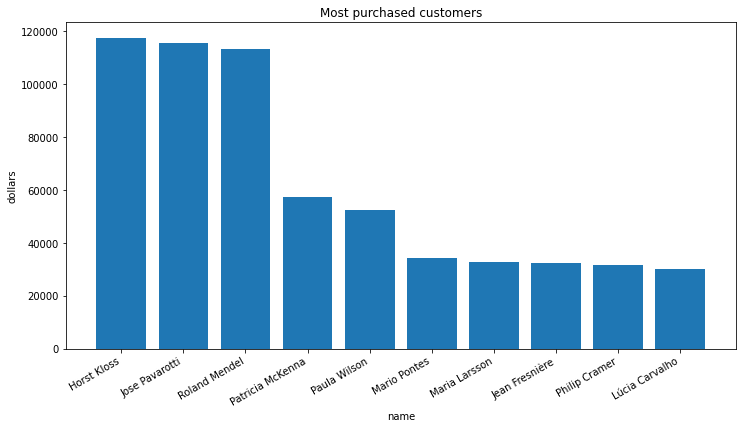

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.bar(range(len(customers)), [i[2] for i in customers])
plt.xticks(range(len(customers)),[i[1] for i in customers], rotation=30, ha='right')
plt.xlabel('name')
plt.ylabel('dollars')
plt.title('Most purchased customers')
plt.show()